In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/praktikum/Praktikum 05"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [4]:
df = pd.read_csv( path + '/Data/stunting_wasting_dataset.csv')
df

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight
...,...,...,...,...,...,...
99995,Laki-laki,11,75.3,7.3,Normal,Underweight
99996,Laki-laki,21,93.7,14.8,Normal,Risk of Overweight
99997,Perempuan,18,82.9,12.6,Normal,Risk of Overweight
99998,Laki-laki,7,73.6,5.5,Normal,Severely Underweight


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis Kelamin      100000 non-null  object 
 1   Umur (bulan)       100000 non-null  int64  
 2   Tinggi Badan (cm)  100000 non-null  float64
 3   Berat Badan (kg)   100000 non-null  float64
 4   Stunting           100000 non-null  object 
 5   Wasting            100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [6]:
df.isnull().sum()

,0
Jenis Kelamin,0
Umur (bulan),0
Tinggi Badan (cm),0
Berat Badan (kg),0
Stunting,0
Wasting,0


In [7]:
df.duplicated().sum()

np.int64(7308)

np.int64(7308)

In [8]:
df = df.rename(columns={
    'Jenis Kelamin':'jenis_kelamin',
    'Umur (bulan)':'umur_bulan',
    'Tinggi Badan (cm)':'tinggi_cm',
    'Berat Badan (kg)':'berat_kg',
    'Stunting':'stunting',
    'Wasting':'wasting'
})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   jenis_kelamin  100000 non-null  object 
 1   umur_bulan     100000 non-null  int64  
 2   tinggi_cm      100000 non-null  float64
 3   berat_kg       100000 non-null  float64
 4   stunting       100000 non-null  object 
 5   wasting        100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

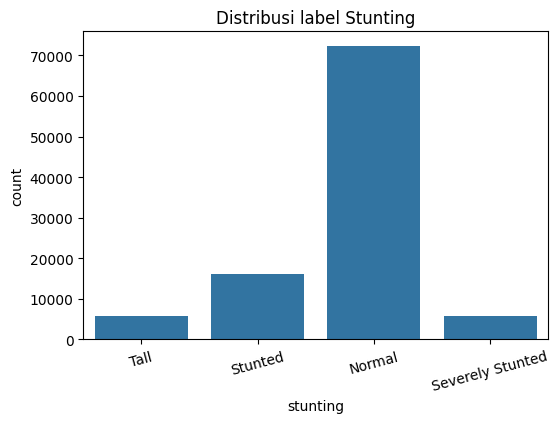

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='stunting', data=df)
plt.title('Distribusi label Stunting')
plt.xticks(rotation=15)
plt.show()

In [24]:
# mapping label -> kode untuk target
stunting_cat = df['stunting'].astype('category')
stunting_classes = list(stunting_cat.cat.categories)   # urutan kelas
df['stunting'] = stunting_cat.cat.codes                # y numerik

# fitur kategorikal lain (jenis_kelamin, wasting)
for col in ['jenis_kelamin', 'wasting']:
    if col in df.columns:
        df[col] = df[col].astype('category').cat.codes

# menampilkan 5 baris pertama untuk memastikan hasil konversi
df.head()


,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


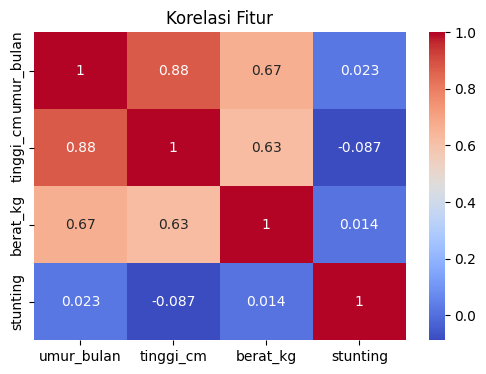

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

In [16]:
# Memilih Fitur dan Target
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']

X = df[feature_cols]
y = df['stunting']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
len(X_train), len(X_test)

(80000, 20000)

In [23]:
df.dtypes

,0
jenis_kelamin,int8
umur_bulan,int64
tinggi_cm,float64
berat_kg,float64
stunting,int8
wasting,int8


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Contoh jika kolom 'wasting' atau 'stunting' masih berupa teks
df['wasting'] = le.fit_transform(df['wasting'])
df['stunting'] = le.fit_transform(df['stunting'])

In [30]:
df.isnull().sum()

,0
jenis_kelamin,0
umur_bulan,0
tinggi_cm,0
berat_kg,0
stunting,0
wasting,0


In [34]:
# Pisahkan fitur dan target lagi
feature_cols = ['umur_bulan', 'tinggi_cm', 'berat_kg', 'wasting']
X = df[feature_cols]
y = df['stunting']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Bangun model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [37]:
# Evaluasi
stunting_classes = [str(c) for c in stunting_classes]

y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=stunting_classes
))


Akurasi: 77.67 %

Confusion Matrix:
 [[13927     0   484    51]
 [  666    15   483     0]
 [ 1790     0  1442     0]
 [  992     0     0   150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     14462
           1       1.00      0.01      0.03      1164
           2       0.60      0.45      0.51      3232
           3       0.75      0.13      0.22      1142

    accuracy                           0.78     20000
   macro avg       0.79      0.39      0.41     20000
weighted avg       0.78      0.78      0.73     20000



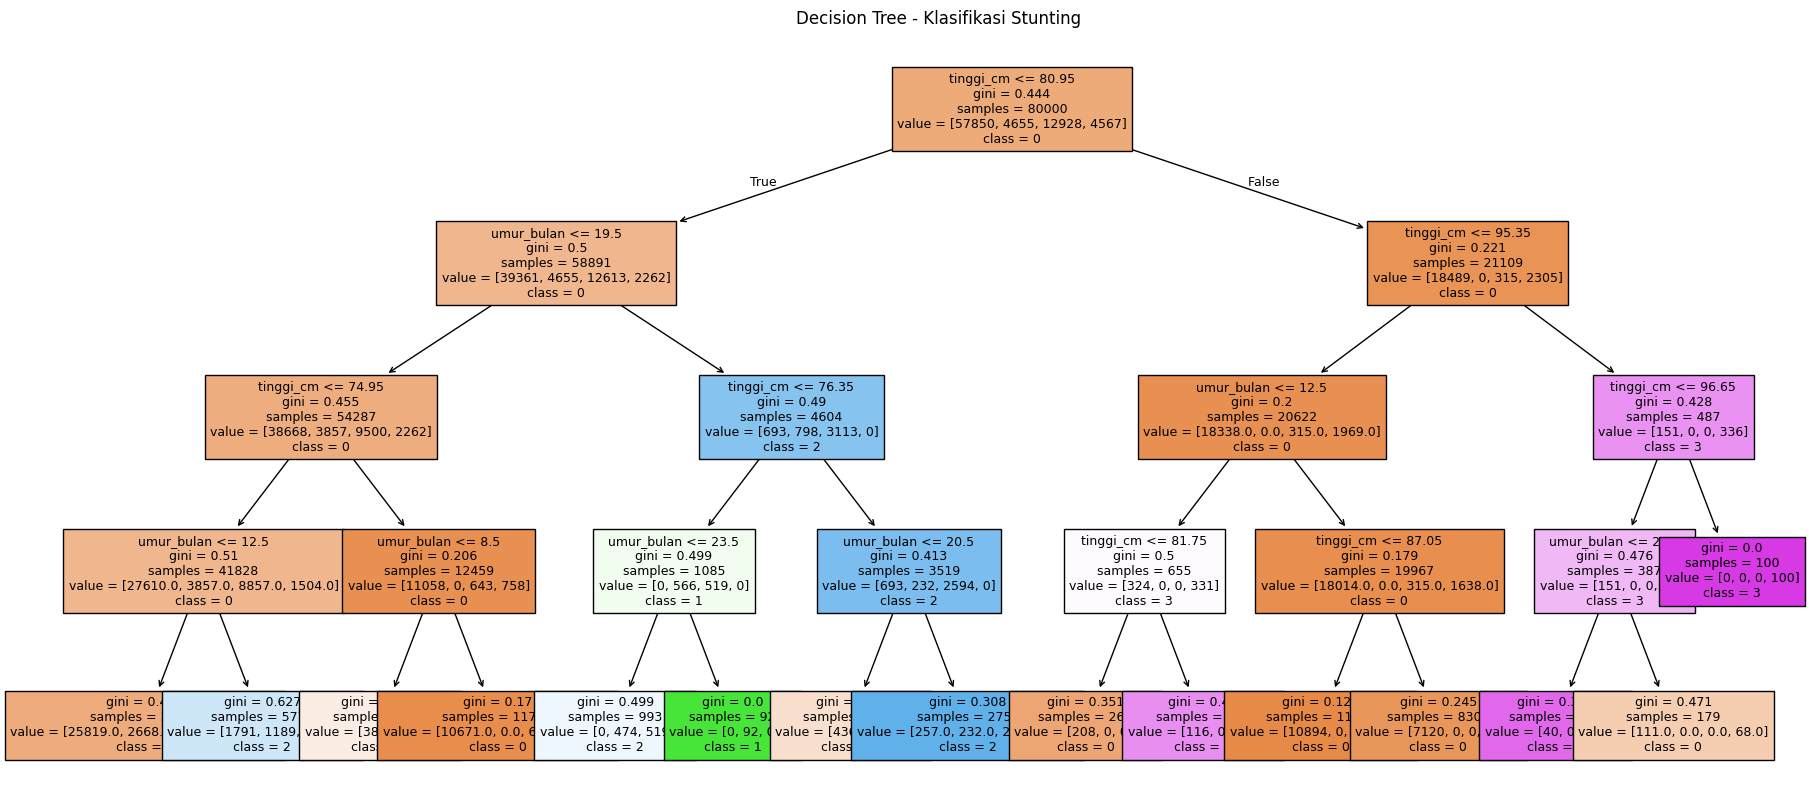

In [38]:
# Visualisasi model Decision Tree
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes,  # kembali ke nama kelas asli
    filled=True,
    fontsize=9
)
plt.title("Decision Tree - Klasifikasi Stunting")
plt.show()

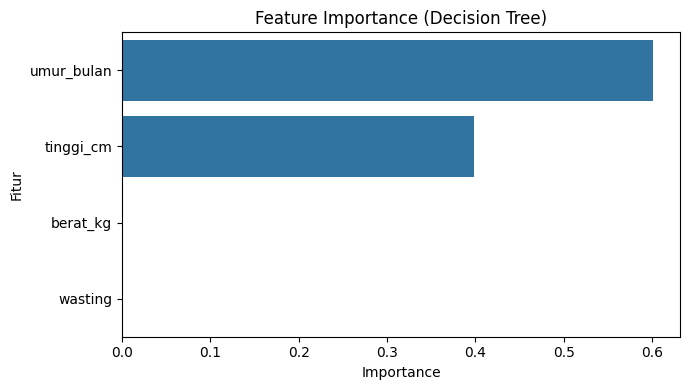

,0
umur_bulan,0.601421
tinggi_cm,0.398579
berat_kg,0.000000
wasting,0.000000


In [39]:
imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(7, 4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()
imp

In [40]:
scores = {}
for d in range(2, 10):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))

# Menampilkan hasil akurasi setiap depth
scores

# Mencari depth terbaik
best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d] * 100, 2), "%")

Best max_depth: 9 | Acc: 85.39 %
